In [1]:
#Q1 from decimal to binary
print("enter number:")
number = int(input())
ans = ""
while number > 0:
    number_2_base = number % 2
    ans = ans + str(number_2_base)
    number = number // 2
print(ans)

enter number:
2
01


In [2]:
#from decimal to octaly
print("Enter number:")
number = int(input())
ans = ""
while number > 0:
    number_8_base = number % 8
    ans = str(number_8_base) + ans
    number = number // 8
print(ans)

Enter number:
45
55


In [3]:
#from decimal to exadecimal
print("Enter number:")
number = int(input())
ans = ""
while number > 0:
    number_16_base = number % 16
    if number_16_base == 10:
        number_16_base = 'A'
    if number_16_base == 11:
        number_16_base = 'B'
    if number_16_base == 12:
        number_16_base = 'C'
    if number_16_base == 13:
        number_16_base = 'D'
    if number_16_base == 14:
        number_16_base = 'E'
    if number_16_base == 15:
        number_16_base = 'F'
    if number_16_base == 16:
        number_16_base = 10
    ans = str(number_16_base) + ans
    number = number // 16
print(ans)

Enter number:
65655
10077


In [3]:
import pandas as pd
import numpy as np

In [102]:
cast = pd.read_csv(r'C:\Users\meirk\Desktop\Ariel\data_sceince\cast.csv')
cast.head()

title  year       name   type character     n
0                    Suuri illusioni  1985     Homo $  actor    Guests  22.0
1     Gangsta Rap: The Glockumentary  2007  Too $hort  actor   Himself   NaN
2                  Menace II Society  1993  Too $hort  actor   Lew-Loc  27.0
3  Porndogs: The Adventures of Sadie  2009  Too $hort  actor     Bosco   3.0
4                 Stop Pepper Palmer  2014  Too $hort  actor   Himself   NaN

## Question 2

In [4]:
#Question 1
#select only the movies with the title 'Hamlet'
is_Hamlet = cast['title'] == 'Hamlet'
#sum how mny movies are they
hamlet1 = sum(is_Hamlet)
print("number of ""Hamlet"" films is: ", hamlet1)

number of Hamlet films is:  299


In [5]:
#Question 2
#grouping by titles and select only Treasure Island movies
q_2 = cast.groupby(['title'])
treasure = q_2.get_group('Treasure Island')
#dropping duplicates
treasureIsland = treasure.drop_duplicates(subset = 'year')
#sorted by ascending order
sortedTreasure = treasureIsland.sort_values(by = 'year')
sortedTreasure

title  year                name   type         character  \
313097  Treasure Island  1918   Francis Carpenter  actor       Jim Hawkins   
345942  Treasure Island  1920          Lon Chaney  actor        Blind Pew    
8570    Treasure Island  1934        Robert Adair  actor      Tom - Seaman   
12141   Treasure Island  1950        Chris Adcock  actor              Pike   
38151   Treasure Island  1972  Cristino Almod?var  actor           O'Brien   
484325  Treasure Island  1973      Richard Dawson  actor  Long John Silver   
14899   Treasure Island  1985         Yves Afonso  actor    French captain   
104905  Treasure Island  1999    Lance (II) Baker  actor             Frank   

           n  
313097   1.0  
345942   5.0  
8570     NaN  
12141   26.0  
38151   18.0  
484325   1.0  
14899    8.0  
104905   1.0

In [116]:
#Question 3
#listing the roles that credited in the silent 1921 version of Hamlet 
hamlet1921 = (cast['title'] == 'Hamlet') & (cast['year'] == 1921)
#sum and print
print(sum(hamlet1921), "roles were credited in the silent 1921 version of Hamlet")

9 roles were credited in the silent 1921 version of Hamlet


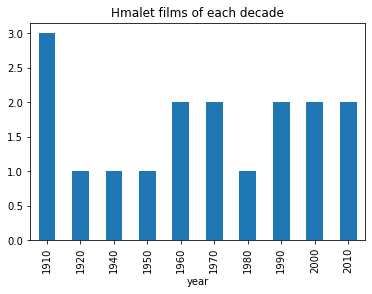

In [7]:
#Question 4
#grouping by Hamlet
hamlet2 = q_2.get_group('Hamlet')
#droping duplicates
hamlet3 = hamlet2.drop_duplicates(subset = 'year')
#grouping by decades
hamletDecade = hamlet3.groupby((hamlet3['year']//10)*10)
#plot
hamletDecade.size().plot(kind = 'bar', title = "Hmalet films of each decade")

In [8]:
#Qestion 5
#grouping by decades and select only 1950's
decades = cast.groupby((cast['year']//10)*10)
dec50s = decades.get_group(1950)
#finding all the leading roles were available
actress50s = (dec50s['type'] == 'actress') & (dec50s['n'] == 1)
actors50s = (dec50s['type'] == 'actor') & (dec50s['n'] == 1)
#sum as needed and print
print("roles for actors: ", sum(actors50s), "\nroles for acresses: ", sum(actress50s))

roles for actors:  6388 
roles for acresses:  2813


In [114]:
#Question 6
#claim just the movies that showed since the 1990's
cast.sort_values(by = 'year')
cast2 = cast[cast['year'] > 1989]
#sort by release year
cast2.sort_values(by = 'year')

title  year  \
1730092                                     Angel Square  1990   
1853662                                 Funny About Love  1990   
2657579                                       Angel Town  1990   
3102992                               Brodyachiy avtobus  1990   
2657623                              To Sleep with Anger  1990   
...                                                  ...   ...   
2345942  Unity, Guardians Versus Corruption: War of Ages  2021   
1880015                                      The Hamster  2021   
21002    Unity, Guardians Versus Corruption: War of Ages  2021   
14084    Unity, Guardians Versus Corruption: War of Ages  2021   
14083    Unity, Guardians Versus Corruption: War of Ages  2021   

                     name     type                        character     n  
1730092   Fanzio Robinson    actor                           Gerald   NaN  
1853662        Kevin Shaw    actor                           Waiter  21.0  
2657579      Robin Harlan  actress                    Sara Reichert   NaN  
3102992   Galina Saburova  actress  Verevkina, actress and director  10.0  
2657623  Christina Harley  actress                            Nurse  25.0  
...                   ...      ...                              ...   ...  
2345942     Brianna Bills  actress                    Queen Trinity   NaN  
1880015   Bob (II) Simons    actor            William Steadwell DOD   NaN  
21002        Zack Akerman    actor                             Aqua   NaN  
14084      Tyler Adornato    actor                             Mike   NaN  
14083      Tyler Adornato    actor                             Xile   NaN  

[1971944 rows x 6 columns]

In [115]:
#grouping by n==1
N = cast2.groupby('n')
N1 = N.get_group(1)
#count leading roles for each name
n1ByName = N1.groupby('name').count()
#sorting according descending oreder
sortedByN = n1ByName.sort_values(by = 'n', ascending = False)
#list the 10 actors/actresses
sortedByN[['n']].head(10)

n
name                   
Mohanlal            126
Mammootty           118
Akshay Kumar         87
Jayaram              76
Andy Lau             72
Ajay Devgn           69
Amitabh Bachchan     68
Eric Roberts         68
Nagarjuna Akkineni   60
Dilip                59

In [109]:
N = cast2.groupby('n')

In [110]:
N1 = N.get_group(1)

In [111]:
n1ByName = N1.groupby('name').count()

In [112]:
sortedByN = n1ByName.sort_values(by = 'n', ascending = False)

In [113]:
sortedByN[['n']].head(10)

n
name                   
Mohanlal            126
Mammootty           118
Akshay Kumar         87
Jayaram              76
Andy Lau             72
Ajay Devgn           69
Amitabh Bachchan     68
Eric Roberts         68
Nagarjuna Akkineni   60
Dilip                59

In [365]:
#Question 7
#first lets look on all Oz's roles
names = cast.groupby('name')
frankOz = names.get_group('Frank Oz')
frankOz

title  year      name   type  \
1538776  An American Werewolf in London  1981  Frank Oz  actor   
1538777  An American Werewolf in London  1981  Frank Oz  actor   
1538778             Blues Brothers 2000  1998  Frank Oz  actor   
1538779                  Innocent Blood  1992  Frank Oz  actor   
1538780                      Inside Out  2015  Frank Oz  actor   
...                                 ...   ...       ...    ...   
1538832      The Muppets Take Manhattan  1984  Frank Oz  actor   
1538833      The Muppets Take Manhattan  1984  Frank Oz  actor   
1538834      The Muppets Take Manhattan  1984  Frank Oz  actor   
1538835                  Trading Places  1983  Frank Oz  actor   
1538836      Zathura: A Space Adventure  2005  Frank Oz  actor   

                              character     n  
1538776                     Mr. Collins  13.0  
1538777                      Miss Piggy  13.0  
1538778                          Warden   4.0  
1538779                     Pathologist  21.0  
1538780         Subconscious Guard Dave  14.0  
...                                 ...   ...  
1538832                  Cookie Monster   2.0  
1538833  Ocean Breeze Soap Board Member   2.0  
1538834                   Sam the Eagle   2.0  
1538835                     Corrupt Cop  46.0  
1538836                           Robot   6.0  

[61 rows x 6 columns]

In [312]:
#taking only the films which Frank Oz played more then one role 
counter = frankOz['title'].value_counts()
frankOz[frankOz['title'].isin(counter.index[counter.gt(2)])]

title  year      name   type  \
1538783                    Muppet Treasure Island  1996  Frank Oz  actor   
1538784                    Muppet Treasure Island  1996  Frank Oz  actor   
1538785                    Muppet Treasure Island  1996  Frank Oz  actor   
1538786                    Muppet Treasure Island  1996  Frank Oz  actor   
1538787                        Muppets from Space  1999  Frank Oz  actor   
1538788                        Muppets from Space  1999  Frank Oz  actor   
1538789                        Muppets from Space  1999  Frank Oz  actor   
1538790                        Muppets from Space  1999  Frank Oz  actor   
1538791  Sesame Street Presents: Follow that Bird  1985  Frank Oz  actor   
1538792  Sesame Street Presents: Follow that Bird  1985  Frank Oz  actor   
1538793  Sesame Street Presents: Follow that Bird  1985  Frank Oz  actor   
1538801      The Adventures of Elmo in Grouchland  1999  Frank Oz  actor   
1538802      The Adventures of Elmo in Grouchland  1999  Frank Oz  actor   
1538803      The Adventures of Elmo in Grouchland  1999  Frank Oz  actor   
1538807                    The Great Muppet Caper  1981  Frank Oz  actor   
1538808                    The Great Muppet Caper  1981  Frank Oz  actor   
1538809                    The Great Muppet Caper  1981  Frank Oz  actor   
1538810                    The Great Muppet Caper  1981  Frank Oz  actor   
1538811                    The Great Muppet Caper  1981  Frank Oz  actor   
1538812                    The Great Muppet Caper  1981  Frank Oz  actor   
1538813                The Muppet Christmas Carol  1992  Frank Oz  actor   
1538814                The Muppet Christmas Carol  1992  Frank Oz  actor   
1538815                The Muppet Christmas Carol  1992  Frank Oz  actor   
1538816                The Muppet Christmas Carol  1992  Frank Oz  actor   
1538817                The Muppet Christmas Carol  1992  Frank Oz  actor   
1538818                The Muppet Christmas Carol  1992  Frank Oz  actor   
1538819                The Muppet Christmas Carol  1992  Frank Oz  actor   
1538820                          The Muppet Movie  1979  Frank Oz  actor   
1538821                          The Muppet Movie  1979  Frank Oz  actor   
1538822                          The Muppet Movie  1979  Frank Oz  actor   
1538823                          The Muppet Movie  1979  Frank Oz  actor   
1538824                          The Muppet Movie  1979  Frank Oz  actor   
1538825                          The Muppet Movie  1979  Frank Oz  actor   
1538826                          The Muppet Movie  1979  Frank Oz  actor   
1538827                          The Muppet Movie  1979  Frank Oz  actor   
1538828                The Muppets Take Manhattan  1984  Frank Oz  actor   
1538829                The Muppets Take Manhattan  1984  Frank Oz  actor   
1538830                The Muppets Take Manhattan  1984  Frank Oz  actor   
1538831                The Muppets Take Manhattan  1984  Frank Oz  actor   
1538832                The Muppets Take Manhattan  1984  Frank Oz  actor   
1538833                The Muppets Take Manhattan  1984  Frank Oz  actor   
1538834                The Muppets Take Manhattan  1984  Frank Oz  actor   

                                                 character     n  
1538783                                         Miss Piggy  14.0  
1538784                                        Fozzie Bear  14.0  
1538785                                      Sam the Eagle  14.0  
1538786                                             Animal  14.0  
1538787                                         Miss Piggy   7.0  
1538788                                        Fozzie Bear   7.0  
1538789                                             Animal   7.0  
1538790                                      Sam the Eagle   7.0  
1538791                                     Cookie Monster   3.0  
1538792                                               Bert   3.0  
1538793                               

In [363]:
#sort the df by ascending order of the release year and shows only the needed columns
sortedOz = frankOz.sort_values(by = 'year')
sortedOz.drop_duplicates(subset = 'title', inplace = True)
sortedOz[['title', 'year']]

title  year
1538820                                The Muppet Movie  1979
1538804                              The Blues Brothers  1980
1538798  Star Wars: Episode V - The Empire Strikes Back  1980
1538807                          The Great Muppet Caper  1981
1538776                  An American Werewolf in London  1981
1538805                                The Dark Crystal  1982
1538835                                  Trading Places  1983
1538799      Star Wars: Episode VI - Return of the Jedi  1983
1538800                                    Superman III  1983
1538828                      The Muppets Take Manhattan  1984
1538791        Sesame Street Presents: Follow that Bird  1985
1538794                                   Spies Like Us  1985
1538781                                       Labyrinth  1986
1538813                      The Muppet Christmas Carol  1992
1538779                                  Innocent Blood  1992
1538783                          Muppet Treasure Island  1996
1538778                             Blues Brothers 2000  1998
1538795       Star Wars: Episode I - The Phantom Menace  1999
1538787                              Muppets from Space  1999
1538801            The Adventures of Elmo in Grouchland  1999
1538782                                  Monsters, Inc.  2001
1538796    Star Wars: Episode II - Attack of the Clones  2002
1538797    Star Wars: Episode III - Revenge of the Sith  2005
1538836                      Zathura: A Space Adventure  2005
1538780                                      Inside Out  2015